Prompt:This dataset contains records about mall customers. My objective is to build a model that clusters these customers using the features available in the dataset. follow the CRISP-DM model (Cross-industry standard process for data mining) to perform the task broken down into the following steps; Business Understanding, Data Understanding, Data Preparation, Modeling, and Evaluation.

ChatGPt-4: Let's start by following the CRISP-DM model for your task of clustering mall customers based on the dataset provided.

1. Business Understanding
The goal here is to segment the mall customers into different clusters based on their characteristics. This can help in understanding customer behavior, targeting marketing strategies more effectively, and improving customer service. Clustering can identify distinct groups in the data based on similarities, and these insights can be used to tailor products, services, and promotions to different customer segments.

Do you want me to proceed to the Data Understanding phase?

Prompt: Yes

In [2]:
import pandas as pd

# Load the dataset
data_path = r"C:\Users\youse\OneDrive - NOVAIMS\Thsis kick off\datasets\Clustering\Mall_Customers.csv"
mall_customers = pd.read_csv(data_path)

# Display the first few rows of the dataset
initial_insight = mall_customers.head()

# Check for missing values and data types
missing_values = mall_customers.isnull().sum()
data_types = mall_customers.dtypes

initial_insight, missing_values, data_types


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
 CustomerID                 int64
 Gender                    object
 Age                        int64
 Annual Income (k$)         int64
 Spending Score (1-100)     int64
 dtype: object)

2. Data Understanding
In this phase, we'll start by loading and examining the dataset to understand the features available, check for missing values, and get a preliminary sense of the data structure. This will help us identify which features might be relevant for clustering the mall customers.

Let's load the dataset and take a look at the first few rows, the data types of each column, and check for any missing values.

I'll proceed with this step now.

The dataset contains the following columns:

CustomerID: An identifier for the customer (integer)
Gender: The customer's gender (Male/Female)
Age: The age of the customer (integer)
Annual Income (k$): The customer's annual income in thousand dollars (integer)
Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature (integer)
There are no missing values in the dataset, which simplifies the data preparation phase. The data types appear to be appropriate for each column, with Gender being the only non-numeric column, which may need encoding if used in the clustering model.

Do you want me to proceed to the Data Preparation phase?

Prompt: Yes.

ChatGPT-4:
GPT
3. Data Preparation
In this phase, we'll prepare the data for modeling. This involves steps such as:

Encoding categorical variables if necessary.
Scaling the data, since clustering algorithms like K-Means are sensitive to the scale of the data.
Deciding which features to include in the model.
Given the dataset, we might consider encoding the Gender variable into a numeric format and scaling all numeric features to ensure they contribute equally to the distance computations in clustering.

Let's perform these steps:

Encode the Gender variable as binary (0 and 1).
Scale the numeric features (Age, Annual Income (k$), and Spending Score (1-100)).
I'll proceed with encoding and scaling now. Do you agree with these steps?

Prompt: Yes.



In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the 'Gender' column
label_encoder = LabelEncoder()
mall_customers['Gender'] = label_encoder.fit_transform(mall_customers['Gender'])

# Features to scale: Age, Annual Income, Spending Score
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
mall_customers[features_to_scale] = scaler.fit_transform(mall_customers[features_to_scale])

# Check the first few rows to verify changes
prepared_data_head = mall_customers.head()

prepared_data_head


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


The data preparation steps have been completed:

The Gender variable has been encoded as binary, with values 0 and 1.
The Age, Annual Income (k$), and Spending Score (1-100) features have been scaled to have mean 0 and standard deviation 1, which is standard practice for clustering algorithms to ensure equal weighting of features.
4. Modeling
For the modeling phase, we'll use a clustering algorithm to segment the customers. The K-Means algorithm is a popular choice for clustering because it's straightforward and efficient. However, selecting the optimal number of clusters (k) is crucial for obtaining meaningful clusters.

We can use the Elbow Method to determine the optimal number of clusters by fitting the K-Means algorithm with a range of k values and plotting the Sum of Squared Distances (SSD) for each. The "elbow" point, where the rate of decrease sharply changes, can be considered an optimal value for k.

Do you want me to proceed with determining the optimal number of clusters using the Elbow Method? 

Prompt: Yes.

c:\Users\youse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


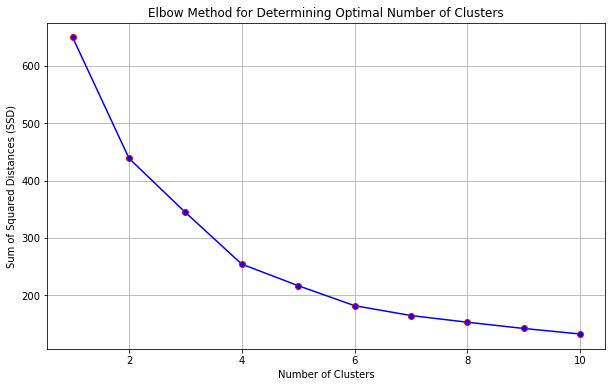

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare features for clustering (excluding CustomerID)
features = mall_customers.drop(['CustomerID'], axis=1)

# Determine the optimal number of clusters using the Elbow Method
ssd = []
range_n_clusters = range(1, 11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features)
    ssd.append(kmeans.inertia_)

# Plotting the SSD for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, 'bo-', markeredgecolor='red')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()


The Elbow Method plot shows the Sum of Squared Distances (SSD) for different numbers of clusters. To determine the optimal number of clusters, we look for the "elbow" point where the rate of decrease in SSD becomes less pronounced.

Based on the plot, the elbow point appears to be around 5 clusters, as the slope of the line decreases significantly after this point. This suggests that 5 might be a reasonable choice for the number of clusters to use for segmenting the mall customers.

5. Evaluation
With the optimal number of clusters identified as 5, we would proceed by fitting the K-Means algorithm with this number of clusters and then evaluate the results to understand the characteristics of each cluster. This could involve analyzing the centroids of each cluster to interpret the defining characteristics of the cluster's members.

Do you want me to proceed with clustering the data into 5 clusters and evaluating the results?

Prompt: Yes.

In [5]:
# Fit K-Means with the optimal number of clusters (5)
kmeans_optimal = KMeans(n_clusters=5, random_state=42)
mall_customers['Cluster'] = kmeans_optimal.fit_predict(features)

# Analyze the centroids of each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans_optimal.cluster_centers_[:, 1:]),
                               columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Add cluster labels to the centroids
cluster_centers['Cluster'] = range(0, 5)

# Count of customers in each cluster
cluster_counts = mall_customers['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Combine centroid information with counts
cluster_analysis = pd.merge(cluster_centers, cluster_counts, on='Cluster')

cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100),Cluster,Count
0,25.272727,25.727273,79.363636,0,22
1,55.551724,48.482759,41.775862,1,58
2,41.264706,88.500000,16.764706,2,34
3,27.957447,50.000000,44.638298,3,47
4,32.692308,86.538462,82.128205,4,39


The clustering resulted in 5 distinct clusters with the following characteristics based on the average values of their features:

Cluster 0: Young customers with low annual income but high spending scores.

Age: ~25 years
Annual Income: ~$25.7k
Spending Score: ~79
Count: 22
Cluster 1: Older customers with moderate annual income and moderate spending scores.

Age: ~56 years
Annual Income: ~$48.5k
Spending Score: ~42
Count: 58
Cluster 2: Middle-aged customers with high annual income but low spending scores.

Age: ~41 years
Annual Income: ~$88.5k
Spending Score: ~17
Count: 34
Cluster 3: Young to middle-aged customers with moderate annual income and moderate spending scores.

Age: ~28 years
Annual Income: ~$50k
Spending Score: ~45
Count: 47
Cluster 4: Young to middle-aged customers with high annual income and high spending scores.

Age: ~33 years
Annual Income: ~$86.5k
Spending Score: ~82
Count: 39
These clusters suggest distinct segments of mall customers based on their age, annual income, and spending behavior. This segmentation can be used for targeted marketing strategies, personalized offers, and improving customer service by understanding the different needs and behaviors of each cluster.

Would you like to explore further or need assistance with any other aspect of your analysis?

Evaluate the model performance.


To evaluate the performance of the clustering model, especially when the true labels are not known, we typically use internal metrics that measure the quality of the clustering. For K-Means, two common metrics are:

Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. The Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If the score is close to 1, the clustering configuration is good.

Calinski-Harabasz Index: Also known as the Variance Ratio Criterion. It is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters. The higher the score, the better the model has done for distinguishing between clusters.

Let's compute these metrics for our clustering model to evaluate its performance.

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Extract the feature set for evaluation
X = features

# Predicted cluster labels
labels = mall_customers['Cluster']

# Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(X, labels)

silhouette_avg, calinski_harabasz_avg


(0.34977050035201074, 97.25832335913094)

The evaluation metrics for the clustering model are as follows:

Silhouette Score: 0.35
Calinski-Harabasz Index: 97.26
The Silhouette Score of 0.35 suggests that, on average, clusters are farther apart and more distinct than a lower score would indicate, but there's still room for improvement as the score is not close to 1.

The Calinski-Harabasz Index of 97.26 indicates that the clusters are relatively well separated and dense, which is a sign of a good clustering structure, given that higher values are desirable.

These metrics suggest that the clustering has performed reasonably well in separating the customers into distinct groups, though there might be opportunities for further improvement, possibly by experimenting with different numbers of clusters or preprocessing steps.

Would you like to explore any other aspects of this analysis or have any further questions?